<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sources:" data-toc-modified-id="Sources:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sources:</a></span></li><li><span><a href="#Astropy" data-toc-modified-id="Astropy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Astropy</a></span><ul class="toc-item"><li><span><a href="#Querieng-Data-from-Simbad." data-toc-modified-id="Querieng-Data-from-Simbad.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Querieng Data from Simbad.</a></span></li><li><span><a href="#Using-the-SkyCoord-object-to-store-and-easily-access-astronomical-coordinates" data-toc-modified-id="Using-the-SkyCoord-object-to-store-and-easily-access-astronomical-coordinates-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using the SkyCoord object to store and easily access astronomical coordinates</a></span></li><li><span><a href="#retrieving-decimal-coordinates-in-degrees-as-float" data-toc-modified-id="retrieving-decimal-coordinates-in-degrees-as-float-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>retrieving decimal coordinates in degrees as float</a></span></li></ul></li><li><span><a href="#Coordinate-Transformation-(RA,DEC---&gt;-AZ,-ALT)" data-toc-modified-id="Coordinate-Transformation-(RA,DEC--->-AZ,-ALT)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Coordinate Transformation (RA,DEC --&gt; AZ, ALT)</a></span></li><li><span><a href="#Coordinate-transformations-for-multiple-objects" data-toc-modified-id="Coordinate-transformations-for-multiple-objects-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coordinate transformations for multiple objects</a></span></li><li><span><a href="#RA-DEC-coordinates-to-ALT-AZ" data-toc-modified-id="RA-DEC-coordinates-to-ALT-AZ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>RA DEC coordinates to ALT AZ</a></span><ul class="toc-item"><li><span><a href="#Location-information" data-toc-modified-id="Location-information-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Location information</a></span></li><li><span><a href="#Crop" data-toc-modified-id="Crop-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Crop</a></span></li></ul></li></ul></div>

# Seminar 4

## Sources: 
- querying: https://astroquery.readthedocs.io/en/latest/
- coordinates: http://docs.astropy.org/en/stable/coordinates/
- coordinate transformations: http://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html
- https://en.wikipedia.org/wiki/Equatorial_coordinate_system


----------------
- https://python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density/
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

## Astropy

### Querieng Data from Simbad.

Following, we want to take a look at, how to obtain information about astronomical objects by name querrieng. Let's assume we know only the name of an object, in this case "m31".

In [1]:
import numpy as np
from matplotlib import pylab as plt

### TO querry object --> simbad
from astroquery.simbad import Simbad


from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation

### for transformations from RA DEC to ALT AZ
from astropy.coordinates import AltAz

M31 = Simbad.query_object("m31")

Following, we print the list of queried objects (columns) and their position, brightness etc. information (rows)

In [2]:
M31

<Table masked=True length=1>
MAIN_ID      RA          DEC      ... COO_WAVELENGTH     COO_BIBCODE    
          "h:m:s"      "d:m:s"    ...                                   
 object  unicode13    unicode13   ...    unicode1           object      
------- ------------ ------------ ... -------------- -------------------
  M  31 00 42 44.330 +41 16 07.50 ...              I 2006AJ....131.1163S

Following, we extract the coordinate information (RA, DEC) from the table.

In [3]:
M31RA = M31["RA"][0]
M31DE = M31["DEC"][0]
print "Andromeda's RA:  "+M31RA
print "Andromeda's DEC: "+M31DE

Andromeda's RA:  00 42 44.330
Andromeda's DEC: +41 16 07.50


The coordinate information's type is string. Therefore we can not directly do math with it and need to transform the coordinate strings into a useful format. Usually, we could use standard python magic to format the coordinate strings into floats.

In [4]:
M31DE.split(" ")

[u'+41', u'16', u'07.50']

In [5]:
A = "A.B.V/fA;das"
A.split(".")

['A', 'B', 'V/fA;das']

However, we don't have to reinvent the wheel. We can use the astropy coordinate system to convert the stings into floats.

### Using the SkyCoord object to store and easily access astronomical coordinates
SkyCoord: High-level object providing a flexible interface for celestial coordinate representation, manipulation, and transformation between systems. (https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html)

In [6]:
M31_RADEC = SkyCoord(M31RA+M31DE, unit=(u.hourangle, u.deg))

### retrieving decimal coordinates in degrees as float 

In [7]:
print M31_RADEC.ra.deg
print M31_RADEC.dec.deg

10.6847083333
41.26875


Now that we could obtain the equatorial coordinates in a general from, we can easily transform them into horizontal coordinates.

## Coordinate Transformation (RA,DEC --> AZ, ALT)

In [8]:
LOCATION = EarthLocation(lat="35.0", lon="134.0", height = 449*u.m)
OBSTIME  = Time('2019-06-12 16:05:18') 
OBSERVER = AltAz(location= LOCATION, obstime = OBSTIME)

In [9]:
M31_RADEC_OBSERVER = M31_RADEC.transform_to(OBSERVER)

In [10]:
print "M31 El: ", M31_RADEC_OBSERVER.alt.deg
print "M31 Az: ", M31_RADEC_OBSERVER.az.deg

M31 El:  19.0417462989
M31 Az:  52.2764145097


## Coordinate transformations for multiple objects
First, we load a data array containing Name, RA, DEC and brightness for a number of objects

In [11]:
STAR_LIST = np.load("NAME_RA_DEC_MAG.npy")

The array contains more than 9000 objects. We can extract the properties for all the objects as follows.

In [12]:
NAME= STAR_LIST[:,0]
RA  = STAR_LIST[:,1].astype(float)
DEC = STAR_LIST[:,2].astype(float)
MAG = STAR_LIST[:,3].astype(float)

In [13]:
print NAME[2]
print NAME[2] == "0"

33    Psc
False


In [14]:
RA.shape[0]

9110

Quick recapitulation on functions: 

In [15]:
def do_x_plus_y(x = 5,y =8):
    c = x + y
    return c

D = do_x_plus_y()
print D

13


Following, we plot all the sources in the data array over RA and DEC. The difference in brightness is realized through color and marker size variation.

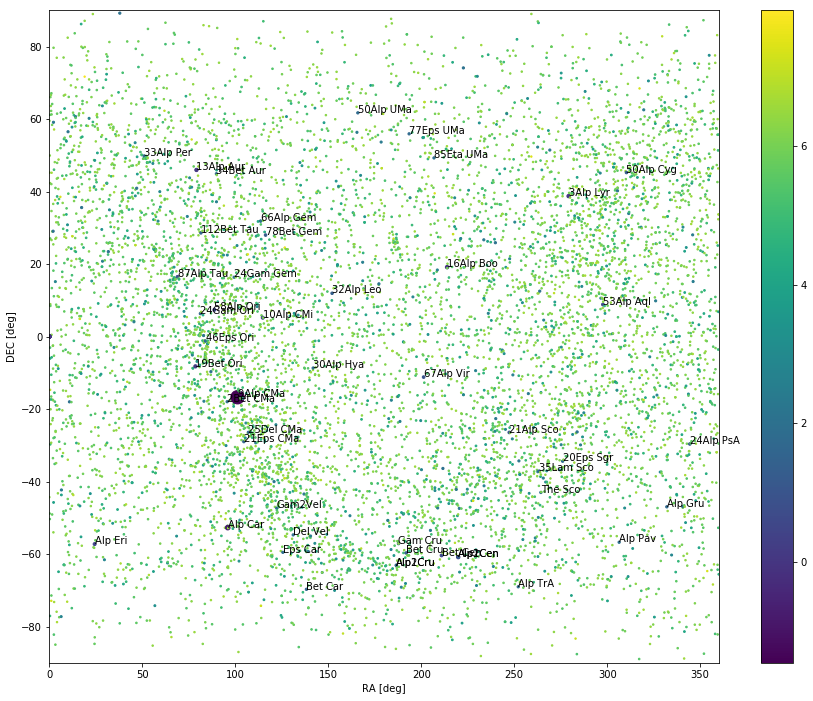

In [16]:
def plot_stars(ra,dec,XL,YL, YLIM_0 = -90, YLIM_1 =90, XLIM_0 = 0, XLIM_1 = 360):
    plt.figure(figsize = (15,12))
    plt.xlim([XLIM_0,XLIM_1])
    plt.ylim([YLIM_0,YLIM_1])
    plt.scatter(ra,dec, s=18./(MAG-MAG.min()+0.1), c = MAG);
    plt.colorbar()
    for i in range(ra.shape[0]):
        if MAG[i] < 2.:
            if dec[i] > YLIM_0:
                if dec[i] < YLIM_1:
                    if ra[i] > XLIM_0:
                        if ra[i] < XLIM_1:
                            if ra[i] > 5:
                                plt.text(ra[i],dec[i],NAME[i])

    plt.xlabel(XL)
    plt.ylabel(YL)
    plt.show()
    
plot_stars(RA,DEC,"RA [deg]","DEC [deg]")

which is the brightest star?

In [17]:
Brightest_index = MAG.argmin()
NAME[Brightest_index]

'9Alp CMa'

## RA DEC coordinates to ALT AZ
### Location information

In [18]:
LOCATION = EarthLocation(lat="35.0", lon="134.0", height = 449*u.m)
OBSTIME  = Time('2019-06-19 20:00:00') 
OBSERVER = AltAz(location= LOCATION, obstime = OBSTIME)

In [19]:
STAR_COORDINATES = SkyCoord(RA,DEC, frame='icrs', unit='deg')
STAR_ALTAZ       = STAR_COORDINATES.transform_to(OBSERVER)

In [20]:
AZ  = STAR_ALTAZ.az.deg
ALT = STAR_ALTAZ.alt.deg

In [21]:
print RA[0],AZ[0]
print DEC[0],ALT[0]

1.2912499999999998 49.5157986933777
45.22916666666667 71.76492300628493


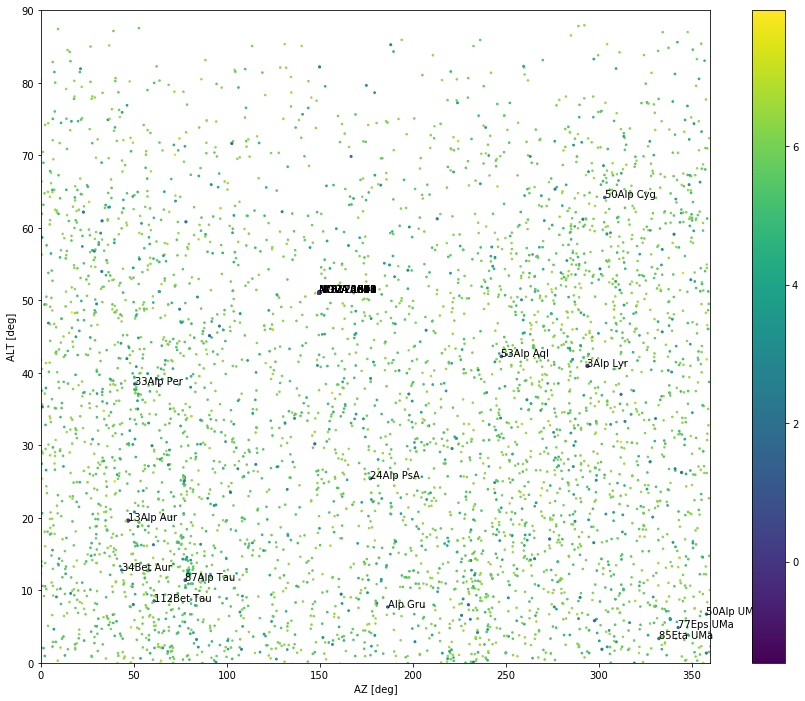

In [22]:
plot_stars(AZ,ALT,"AZ [deg]","ALT [deg]",YLIM_0 = 0)

### Crop

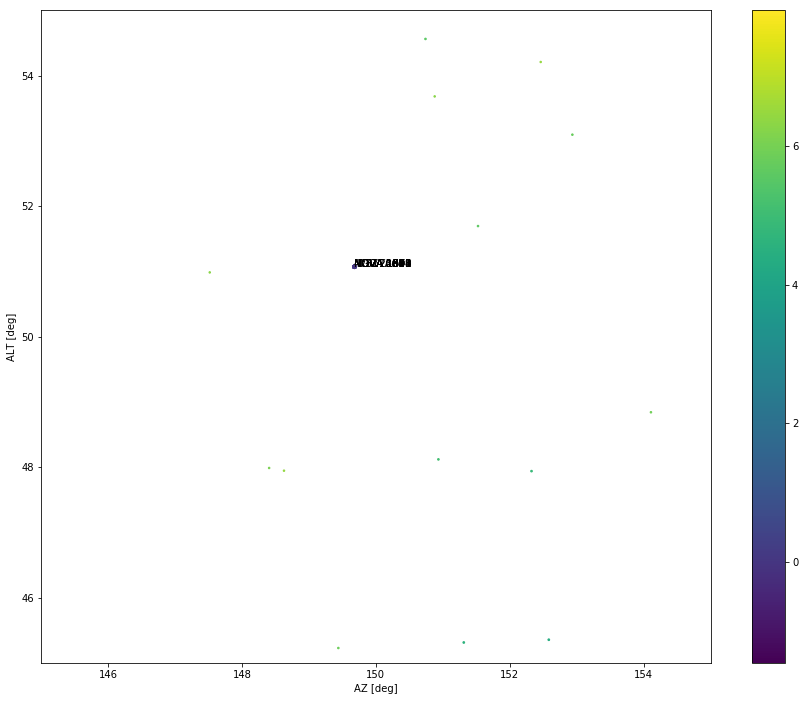

In [23]:
plot_stars(AZ,ALT,"AZ [deg]","ALT [deg]", YLIM_0 = 45, YLIM_1 = 55, XLIM_0 = 145, XLIM_1 = 155)

what are the overlaying objects?

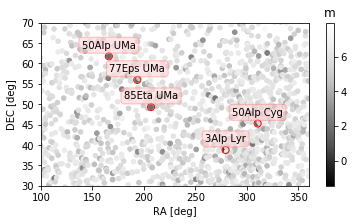

In [43]:
def plot_stars(ra,dec,XL,YL, YLIM_0 = 30, YLIM_1 =70, XLIM_0 = 100, XLIM_1 = 360):
    plt.figure(figsize = (6,3))
    plt.xlim([XLIM_0,XLIM_1])
    plt.ylim([YLIM_0,YLIM_1])
    plt.scatter(ra,dec, s=30./(MAG-MAG.min()+0.1)**0.2, c = MAG, cmap = "Greys_r");
    clb = plt.colorbar()
    clb.ax.set_title('m')
    for i in range(ra.shape[0]):
        if MAG[i] < 2.:
            if dec[i] > YLIM_0*1.1:
                if dec[i] < YLIM_1*0.9:
                    if ra[i] > XLIM_0:
                        if ra[i] < XLIM_1:
                            if ra[i] > 5:
                                plt.scatter(ra[i],dec[i], s = 50, facecolor = "none", edgecolor = "r")
                                plt.text(ra[i],dec[i]+2,NAME[i], ha = "center", 
                                         fontsize = 10,
                                         bbox=dict(boxstyle="round",
                                         ec=(1., 0.5, 0.5),
                                         fc=(1., 0.8, 0.8),
                                         alpha = 0.5))
                                

    plt.xlabel(XL)
    plt.ylabel(YL)
    plt.show()
    
plot_stars(RA,DEC,"RA [deg]","DEC [deg]")